torch.Size([3, 512, 512])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


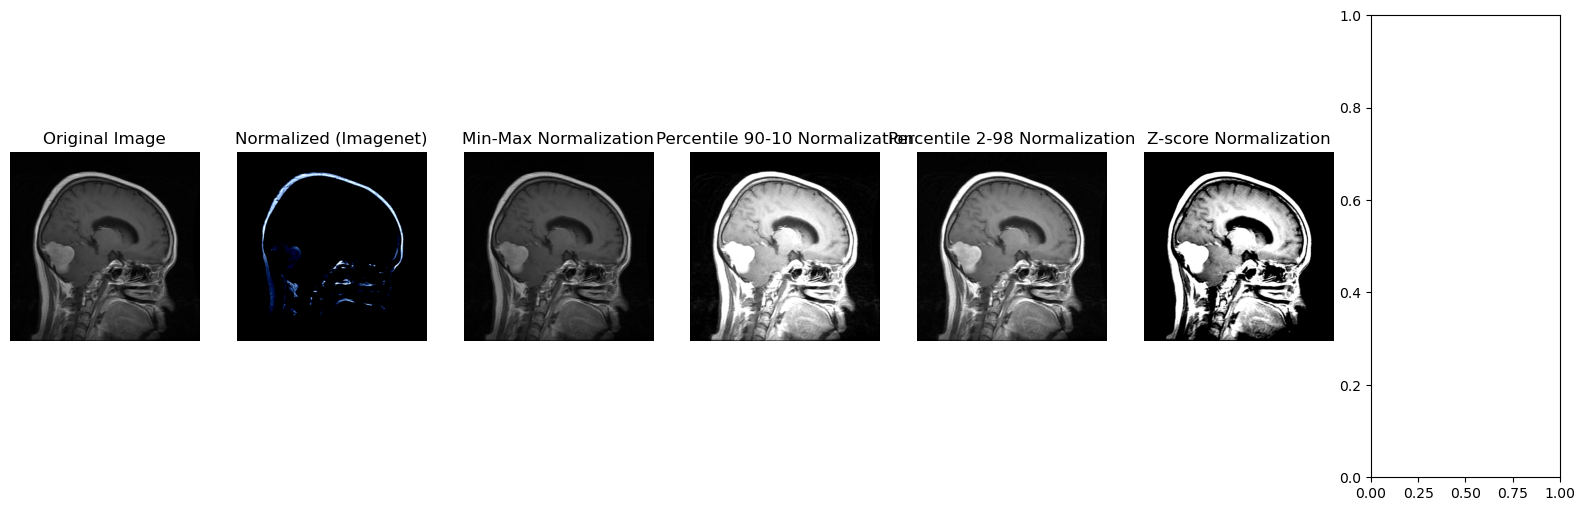

torch.Size([3, 512, 512])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


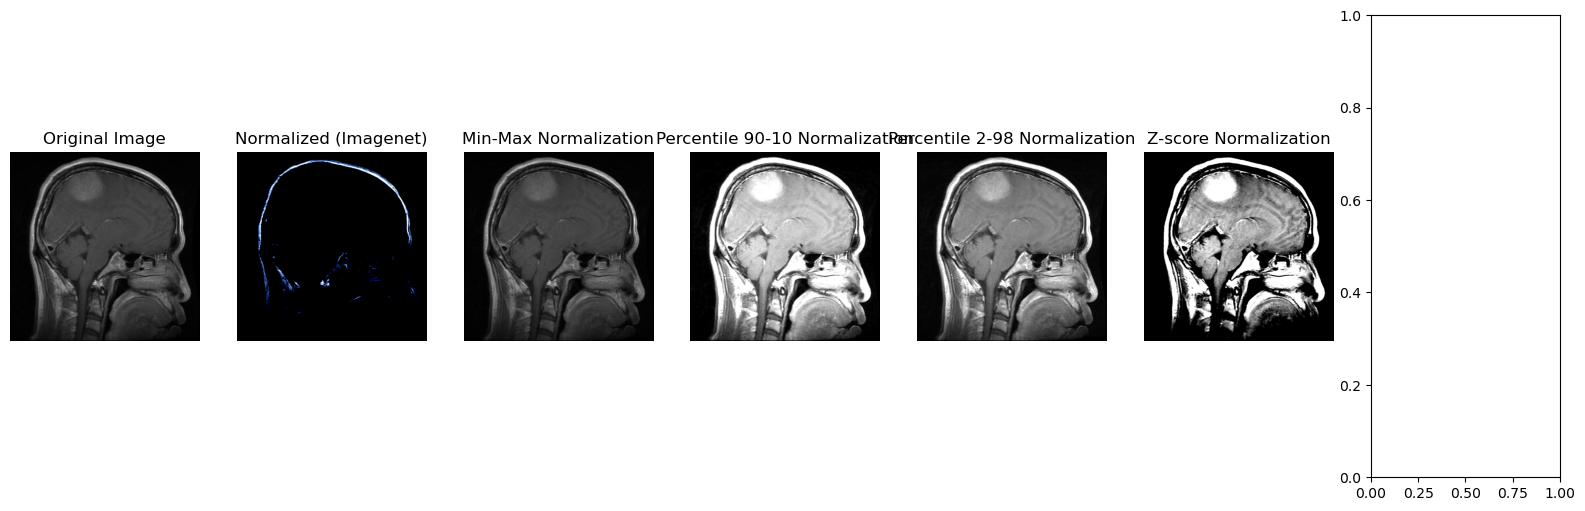

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 322, 352])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


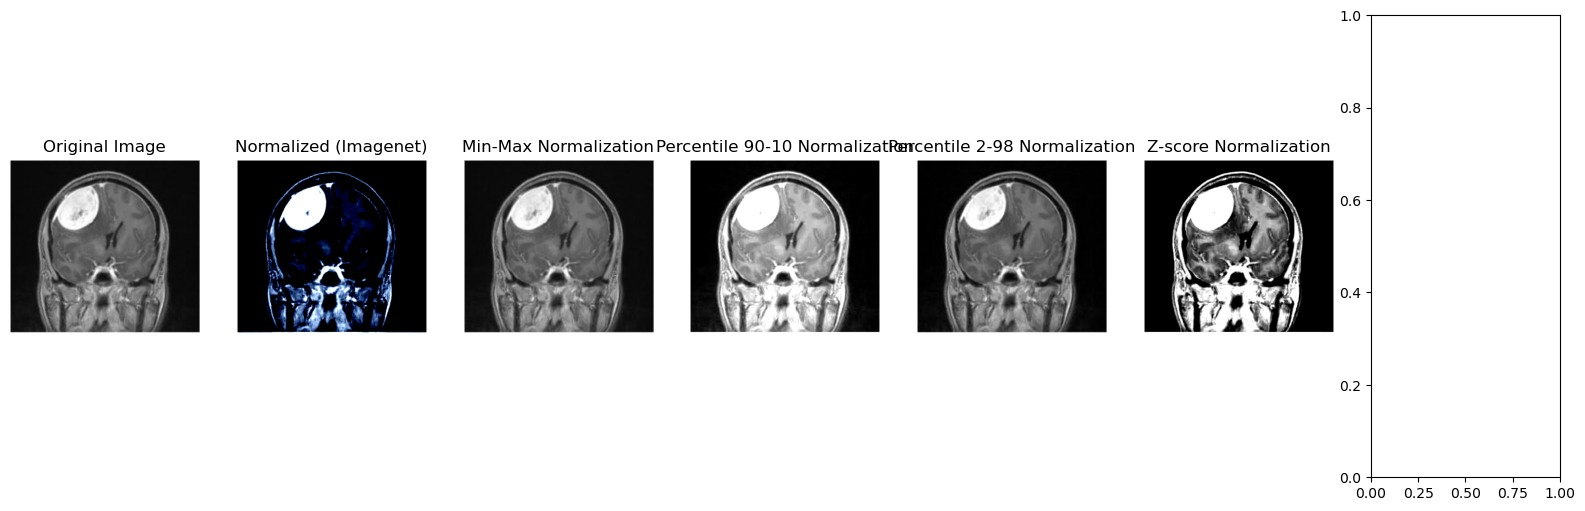

torch.Size([3, 512, 512])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


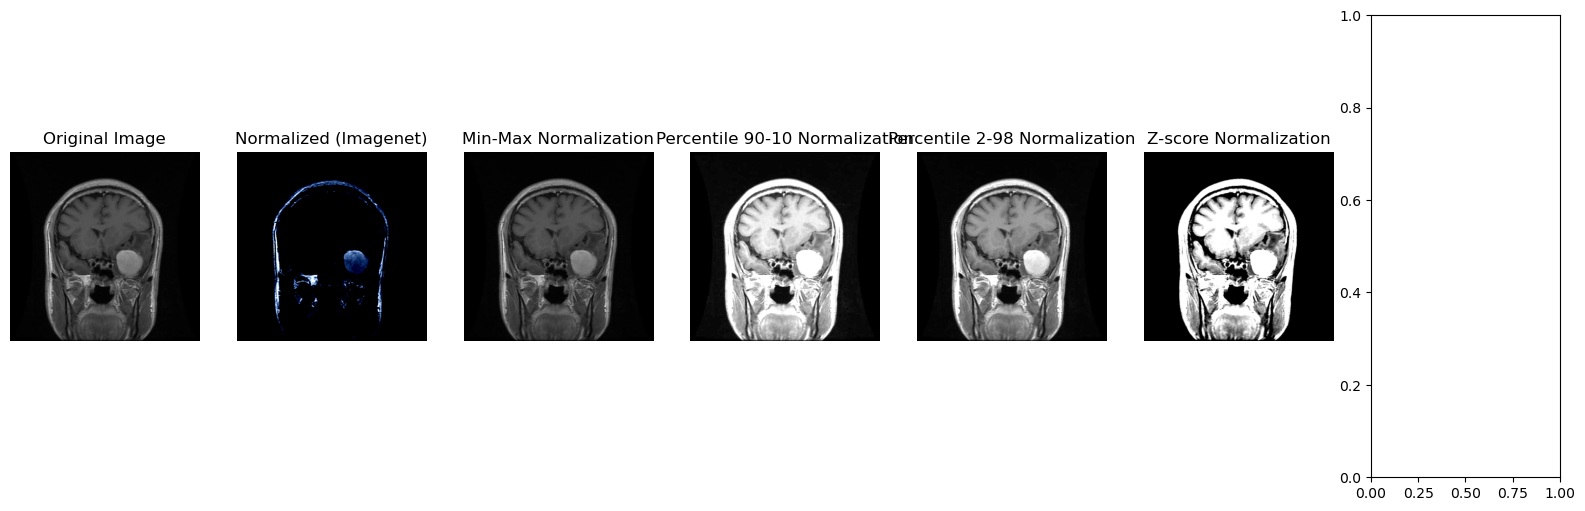

torch.Size([3, 512, 512])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


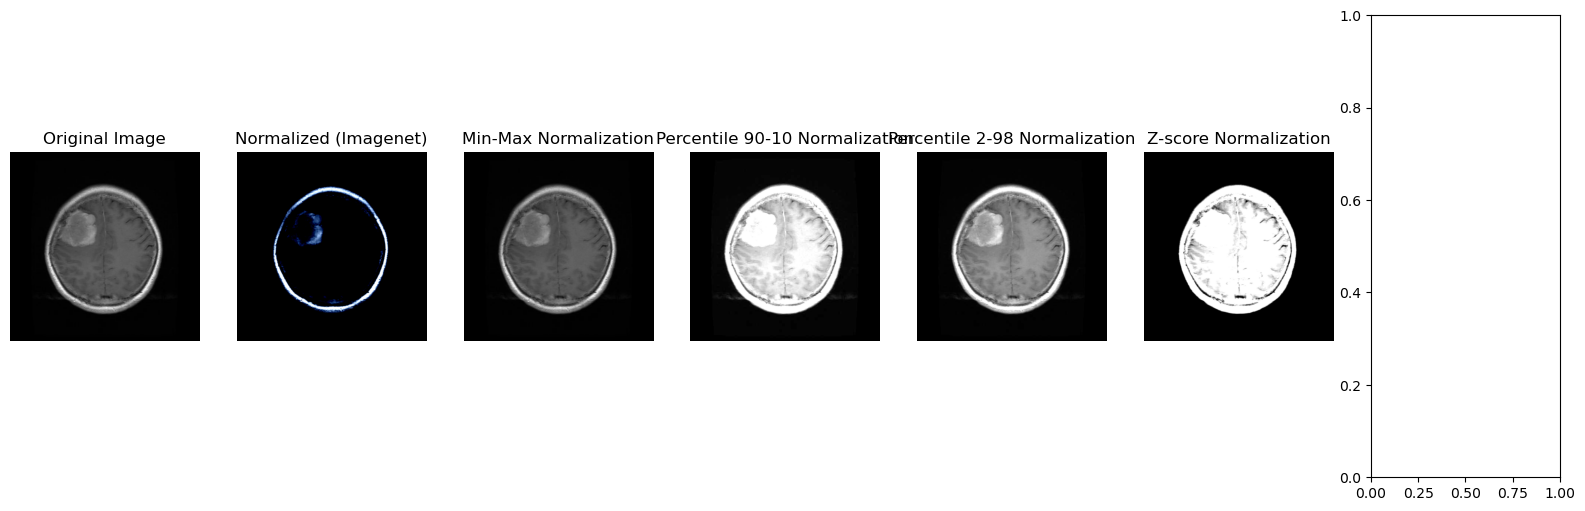

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 512, 512])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


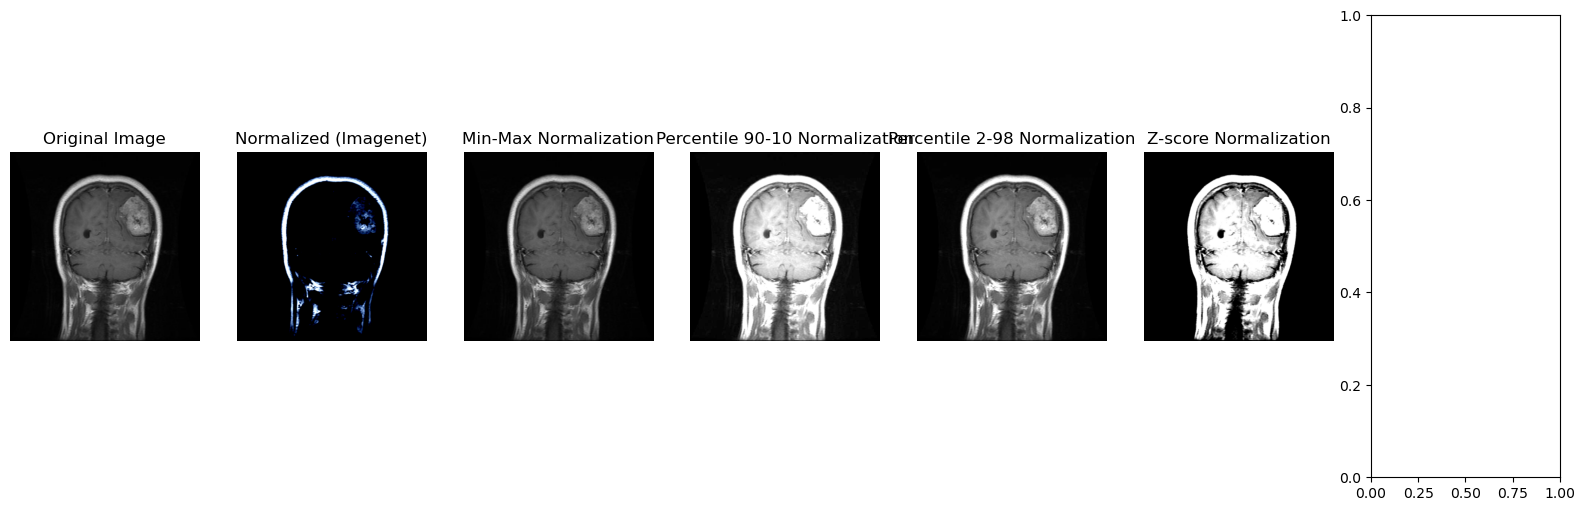

torch.Size([3, 512, 512])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


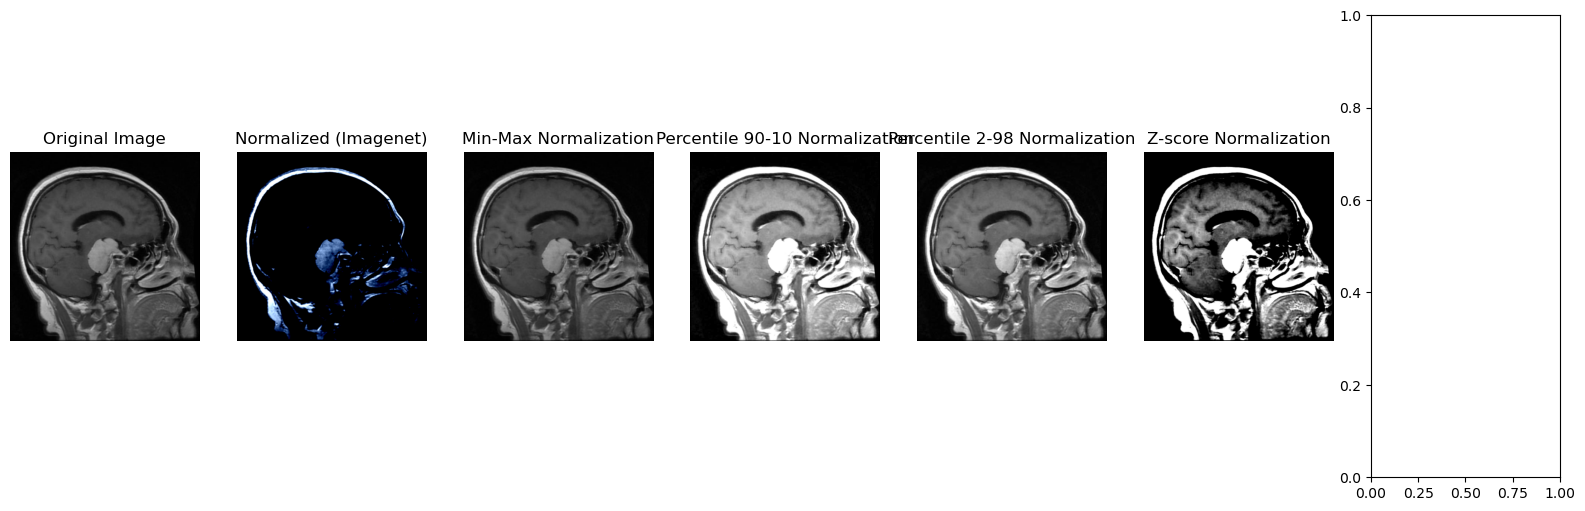

torch.Size([3, 398, 351])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


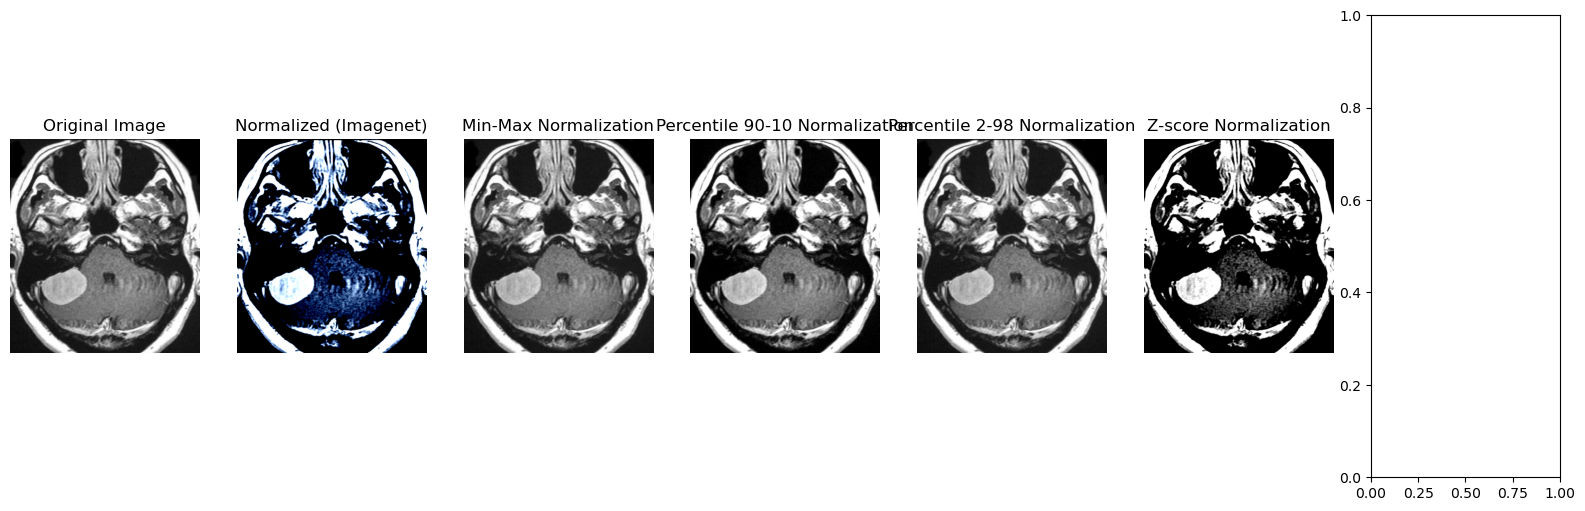

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 225, 225])


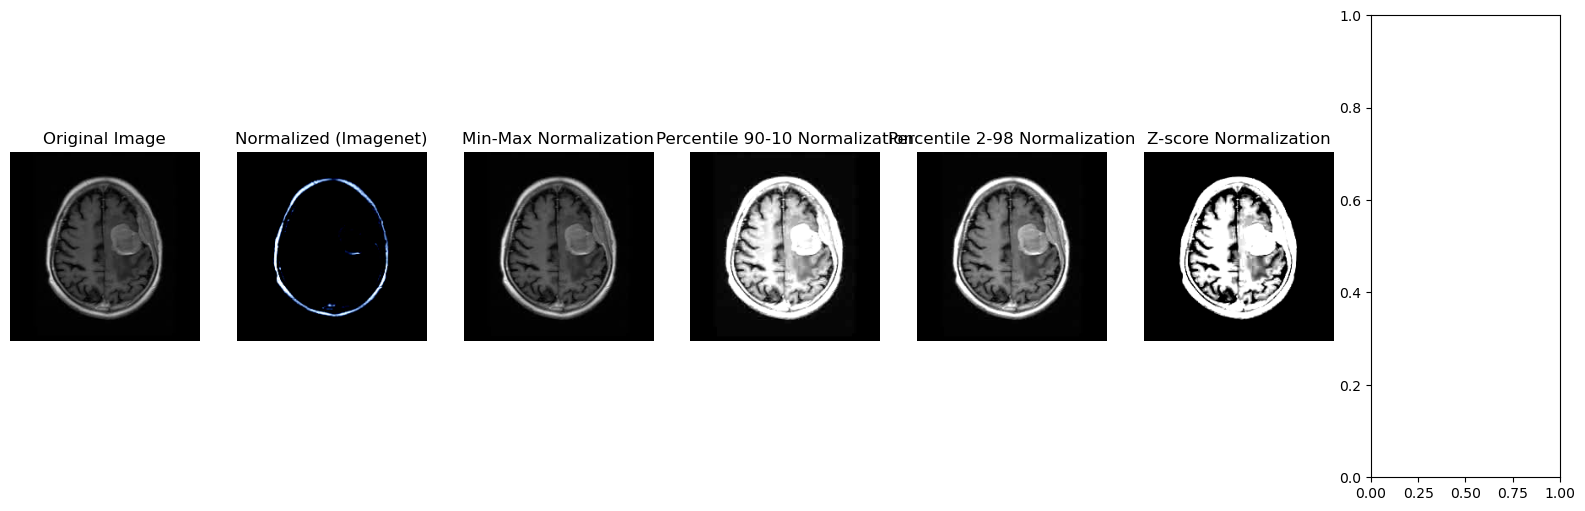

torch.Size([3, 512, 512])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


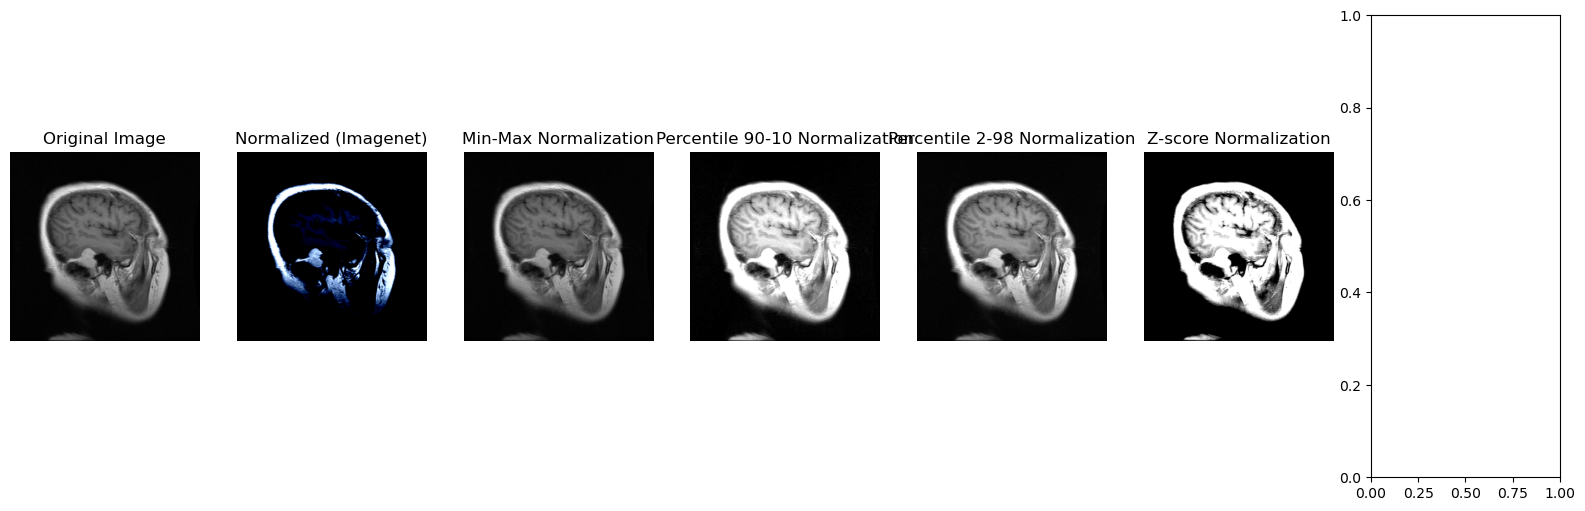

In [78]:
import torch
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os
import random


for im in random.sample(os.listdir('data/kaggle_brain_tumor/Testing/meningioma'), 10):

    image = Image.open(os.path.join('data/kaggle_brain_tumor/Testing/meningioma', im)).convert("RGB")

    # Define transformations
    to_tensor_transform = transforms.ToTensor()
    image_tensor = to_tensor_transform(image)
    print(image_tensor.shape)

    normalize_transform_imagenet = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])

    normalize_transform_adhd = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.03796944, 0.03796944, 0.03796944], std=[0.11620523, 0.11620523, 0.11620523]),
    ])

    
    normalized_image = normalize_transform_imagenet(image).squeeze(0).permute(1, 2, 0)
    normalized_image_adhd = normalize_transform_adhd(image).squeeze(0).permute(1, 2, 0)
    min_max_image = (image_tensor - image_tensor.min()) / (image_tensor.max() - image_tensor.min())
    percentile_90_10_image = torch.clamp((image_tensor - torch.tensor(np.percentile(image_tensor.numpy(), 10))) / 
                                        (torch.tensor(np.percentile(image_tensor.numpy(), 90)) - 
                                        torch.tensor(np.percentile(image_tensor.numpy(), 10))), 0)
    percentile_2_98_image = torch.clamp((image_tensor - torch.tensor(np.percentile(image_tensor.numpy(), 2))) / 
                                        (torch.tensor(np.percentile(image_tensor.numpy(), 98)) - 
                                        torch.tensor(np.percentile(image_tensor.numpy(), 2))), 0)
    z_score_image = (image_tensor - torch.mean(image_tensor)) / torch.std(image_tensor)

    # Convert tensors to numpy arrays for visualization
    normalized_image = normalized_image.numpy()
    min_max_image = min_max_image.squeeze(0).permute(1, 2, 0).numpy()
    percentile_90_10_image = percentile_90_10_image.squeeze(0).permute(1, 2, 0).numpy()
    percentile_2_98_image = percentile_2_98_image.squeeze(0).permute(1, 2, 0).numpy()
    z_score_image = z_score_image.squeeze(0).permute(1, 2, 0).numpy()


    ploting = {
        
        'Original Image': image,
        'Normalized (Imagenet)': normalized_image,
        #'Normalized (ADHD)': normalized_image_adhd,
        'Min-Max Normalization': min_max_image,
        'Percentile 90-10 Normalization': percentile_90_10_image,
        'Percentile 2-98 Normalization': percentile_2_98_image,
        'Z-score Normalization': z_score_image
    }

    # Plot images side by side
    fig, axes = plt.subplots(1, len(ploting), figsize=(20, 6))

    for idx, (key, value) in enumerate(ploting.items()):

        # Original Image
        axes[idx].imshow(value)
        axes[idx].set_title(key)
        axes[idx].axis('off')

    plt.show()

    fig, ax = plt.subplots(figsize=(20, 6))
    ax.hist(image)
    plt.show()

In [40]:
torch.tensor(image)

RuntimeError: Could not infer dtype of PngImageFile

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


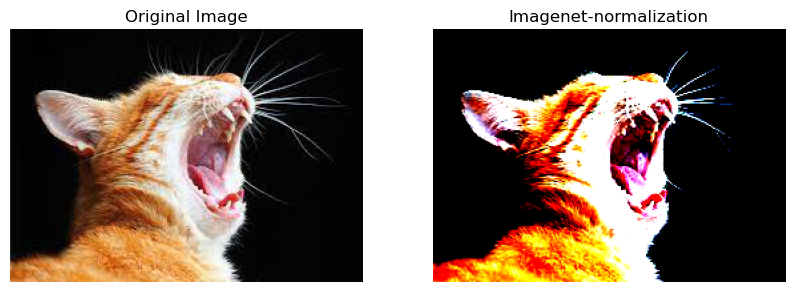

In [142]:
import torch
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os

# Function to normalize image to 90-10 scale
def normalize_90_10(image):
    percentile_90 = np.percentile(image.numpy(), 90)
    percentile_10 = np.percentile(image.numpy(), 10)
    normalized_image = torch.clamp((image - torch.tensor(percentile_10)) / (torch.tensor(percentile_90) - torch.tensor(percentile_10)), 0, 1)
    return normalized_image

# File path of the image
# image_path = 'data/ADHD/slice/adhd/1/sub-55_ses-T1_T1w_slice_133.png'
image_path = 'D:/Személyes/Tanulmányok/ELTE IK/Prog Inf MSc/4.félév/Diplomamunka/repo/mri_processing/notebooks/cat.jpg'


# Load the image
image = Image.open(image_path).convert("RGB")

# Define transformations
to_tensor_transform = transforms.ToTensor()
image_tensor = to_tensor_transform(image)

# Normalize to 90-10 scale
normalized_image = normalize_transform_imagenet(image).squeeze(0)
#normalized_image = normalize_90_10(image_tensor)
#normalized_image = (image_tensor - torch.mean(image_tensor)) / torch.std(image_tensor)
#
# normalized_image = (image_tensor - image_tensor.min()) / (image_tensor.max() - image_tensor.min())
# Convert tensors to numpy arrays for visualization
original_np = image_tensor.permute(1, 2, 0).numpy()
normalized_np = normalized_image.permute(1, 2, 0).numpy()

# Plot images side by side
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(original_np)
axes[0].set_title('Original Image')
axes[0].axis('off')
axes[1].imshow(normalized_np)
axes[1].set_title('Imagenet-normalization')
axes[1].axis('off')
plt.show()


In [131]:
import os
import cv2
import numpy as np
from tqdm import tqdm

def calculate_mean_std(images_folder):
    # Initialize variables to store total pixel count, sum of pixels, and sum of squared pixels
    total_pixels = 0
    sum_pixels = np.zeros(3)  # Initialize for RGB images
    sum_pixels_squared = np.zeros(3)

    # Get list of image file names in the folder
    image_files = [f for f in os.listdir(images_folder) if os.path.isfile(os.path.join(images_folder, f))]

    for image_file in tqdm(image_files, desc="Processing images"):
        # Read image
        image = cv2.imread(os.path.join(images_folder, image_file))

        # Convert image to float32 for accurate calculations
        image = image.astype(np.float32) / 255.0

        # Accumulate pixel values
        total_pixels += image.size
        sum_pixels += np.sum(image, axis=(0, 1))
        sum_pixels_squared += np.sum(np.square(image), axis=(0, 1))


    images_folder ="data/ADHD/slice/adhd/0"
    image_files = [f for f in os.listdir(images_folder) if os.path.isfile(os.path.join(images_folder, f))]
    for image_file in tqdm(image_files, desc="Processing images"):
        # Read image
        image = cv2.imread(os.path.join(images_folder, image_file))

        # Convert image to float32 for accurate calculations
        image = image.astype(np.float32) / 255.0

        # Accumulate pixel values
        total_pixels += image.size
        sum_pixels += np.sum(image, axis=(0, 1))
        sum_pixels_squared += np.sum(np.square(image), axis=(0, 1))

    # Calculate mean and standard deviation
    mean = sum_pixels / total_pixels
    std_dev = np.sqrt((sum_pixels_squared / total_pixels) - np.square(mean))

    return mean, std_dev

# Path to the folder containing images
folder_path = "data/ADHD/slice/adhd/1"

# Calculate mean and standard deviation
mean, std_dev = calculate_mean_std(folder_path)

print("Total Mean:", mean)
print("Total Standard Deviation:", std_dev)


NameError: name 'íííí' is not defined

In [81]:
import pandas as pd
import altair as alt
import calendar

In [92]:
url = 'https://www.coursehero.com/blog/wp-content/uploads/2021/07/fictitious_ch_data_for_questions_answered.csv'
df = pd.read_csv(url)

In [93]:
df['year'] = pd.DatetimeIndex(df['answer_date']).year
df['month'] = pd.DatetimeIndex(df['answer_date']).month

In [118]:
type(normalized_image)

numpy.ndarray

In [117]:
type(normalized_image_adhd)

torch.Tensor

In [113]:
flattened_pixels_adhd.shape

torch.Size([786432])

In [114]:
flattened_pixels.shape

(786432,)

In [112]:
np.min(flattened_pixels_adhd)

TypeError: min() received an invalid combination of arguments - got (axis=NoneType, out=NoneType, ), but expected one of:
 * ()
 * (Tensor other)
 * (int dim, bool keepdim)
      didn't match because some of the keywords were incorrect: axis, out
 * (name dim, bool keepdim)
      didn't match because some of the keywords were incorrect: axis, out


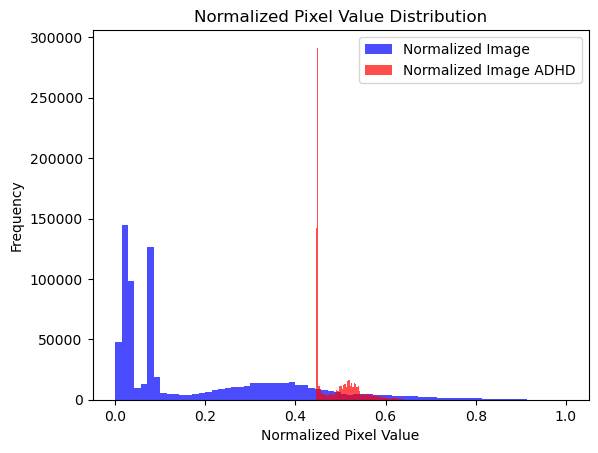

In [120]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming normalized_image and normalized_image_adhd are your image tensors
# Flatten the tensors to 1D arrays
flattened_pixels = normalized_image.flatten()
flattened_pixels_adhd = image_tensor.numpy().flatten()

# Normalize the pixel values to the range [0, 1]
min_val = min(np.min(flattened_pixels), np.min(flattened_pixels_adhd))
max_val = max(np.max(flattened_pixels), np.max(flattened_pixels_adhd))
flattened_pixels = (flattened_pixels - min_val) / (max_val - min_val)
flattened_pixels_adhd = (flattened_pixels_adhd - min_val) / (max_val - min_val)

# Plot histogram of normalized pixel values
plt.hist(flattened_pixels, bins=70, color='blue', alpha=0.7, label='Normalized Image')
plt.hist(flattened_pixels_adhd, bins=70, color='red', alpha=0.7, label='Normalized Image ADHD')
plt.xlabel('Normalized Pixel Value')
plt.ylabel('Frequency')
plt.title('Normalized Pixel Value Distribution')
plt.legend()
plt.show()


In [95]:
df.groupby('year')['month'].count()
chart_data = df[['answer_date','questions_answered']]
chart_data.columns = ['date','metric_value']
step = 40
overlap = 1
chart_width = 600
## Adjustments to chart colors
color_scheme = 'sinebow'
domain_range_first_value = 15000
domain_range_second_value = 40000
x_axis_label = '# of Questions Answered'
alt.Chart(chart_data, height=step,width=chart_width).transform_timeunit(
    Month='month(date)'
).transform_joinaggregate(
    mean_of_metric='mean(metric_value)', groupby=['Month']
).transform_bin(
    ['bin_max', 'bin_min'], 'metric_value'
).transform_aggregate(
    value='count()', groupby=['Month', 'mean_of_metric', 'bin_min', 'bin_max']
).transform_impute(
    impute='value', groupby=['Month', 'mean_of_metric'], key='bin_min', value=0
).mark_area(
    interpolate='monotone',
    fillOpacity=0.8,
    stroke='lightgray',
    strokeWidth=0.5
).encode(
    alt.X('bin_min:Q', bin='binned', title='# of Questions Answered'),
    alt.Y(
        'value:Q',
        scale=alt.Scale(range=[step, -step * overlap]),
        axis=None
    ),
    alt.Fill(
        'mean_of_metric:Q',
        legend=None,
        scale=alt.Scale(domain=[domain_range_first_value,domain_range_second_value], scheme=color_scheme)
    )
).facet(
    row=alt.Row(
        'Month:T',
        title=None,
        header=alt.Header(labelAngle=0, labelAlign='right', format='%B')
    )
).properties(
    bounds='flush'
).configure_facet(
    spacing=0
).configure_view(
    stroke=None
)

alt.FacetChart(...)